In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from IPython.core.interactiveshell import InteractiveShell 
import math
InteractiveShell.ast_node_interactivity = "all"

In [3]:
print('=====load dataset=====')
train_set=pd.read_csv('D:\\18\\bdt\\5001\\personal project\\data\\train.csv',header='infer')
test_set=pd.read_csv('D:\\18\\bdt\\5001\\personal project\\data\\test.csv',header='infer')

train_set.info()
train_set.shape
train_set.describe()
test_set.info()
test_set.head()
test_set.shape

=====load dataset=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
id                      400 non-null int64
penalty                 400 non-null object
l1_ratio                400 non-null float64
alpha                   400 non-null float64
max_iter                400 non-null int64
random_state            400 non-null int64
n_jobs                  400 non-null int64
n_samples               400 non-null int64
n_features              400 non-null int64
n_classes               400 non-null int64
n_clusters_per_class    400 non-null int64
n_informative           400 non-null int64
flip_y                  400 non-null float64
scale                   400 non-null float64
time                    400 non-null float64
dtypes: float64(5), int64(9), object(1)
memory usage: 47.0+ KB


(400, 15)

,id,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,time
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,0.502687,0.003725,555.510000,489.21000,2.810000,756.210000,766.145000,5.855000,3.457500,8.675000,0.048519,50.339018,3.202330
std,115.614301,0.232231,0.004475,265.000042,287.45622,2.951386,373.326402,375.214116,2.492892,1.100555,1.521566,0.030369,28.992873,5.265786
min,0.000000,0.100356,0.000100,103.000000,0.00000,-1.000000,100.000000,110.000000,2.000000,2.000000,5.000000,0.000047,1.527627,0.075342
25%,99.750000,0.299859,0.000100,333.250000,232.25000,1.000000,451.500000,439.750000,4.000000,3.000000,8.000000,0.020567,25.230494,0.504478
50%,199.500000,0.491566,0.001000,532.000000,499.00000,2.000000,748.000000,774.000000,6.000000,3.000000,9.000000,0.046995,51.629863,1.405072
75%,299.250000,0.704260,0.010000,787.250000,728.00000,4.000000,1065.750000,1088.500000,8.000000,4.000000,10.000000,0.074997,74.948272,3.628776
max,399.000000,0.895220,0.010000,998.000000,1000.00000,8.000000,1397.000000,1397.000000,10.000000,5.000000,12.000000,0.099866,99.748437,41.099969


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
id                      100 non-null int64
penalty                 100 non-null object
l1_ratio                100 non-null float64
alpha                   100 non-null float64
max_iter                100 non-null int64
random_state            100 non-null int64
n_jobs                  100 non-null int64
n_samples               100 non-null int64
n_features              100 non-null int64
n_classes               100 non-null int64
n_clusters_per_class    100 non-null int64
n_informative           100 non-null int64
flip_y                  100 non-null float64
scale                   100 non-null float64
dtypes: float64(4), int64(9), object(1)
memory usage: 11.0+ KB


,id,penalty,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale
0,0,l2,0.690384,0.001,602,890,4,1376,1078,3,4,8,0.049072,40.832757
1,1,elasticnet,0.215088,0.001,522,357,4,598,1528,10,3,11,0.041393,68.611537
2,2,l2,0.217458,0.001,398,105,16,553,1008,8,5,8,0.005987,61.713892
3,3,none,0.120303,0.001,439,586,16,1977,1319,3,4,10,0.002964,58.631194
4,4,none,0.458851,0.010,278,246,4,1826,1530,7,5,8,0.050126,87.315374


(100, 14)

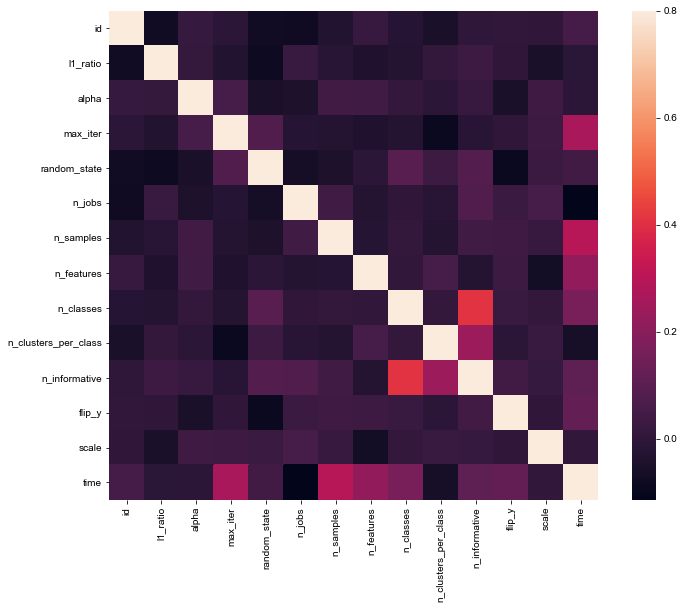

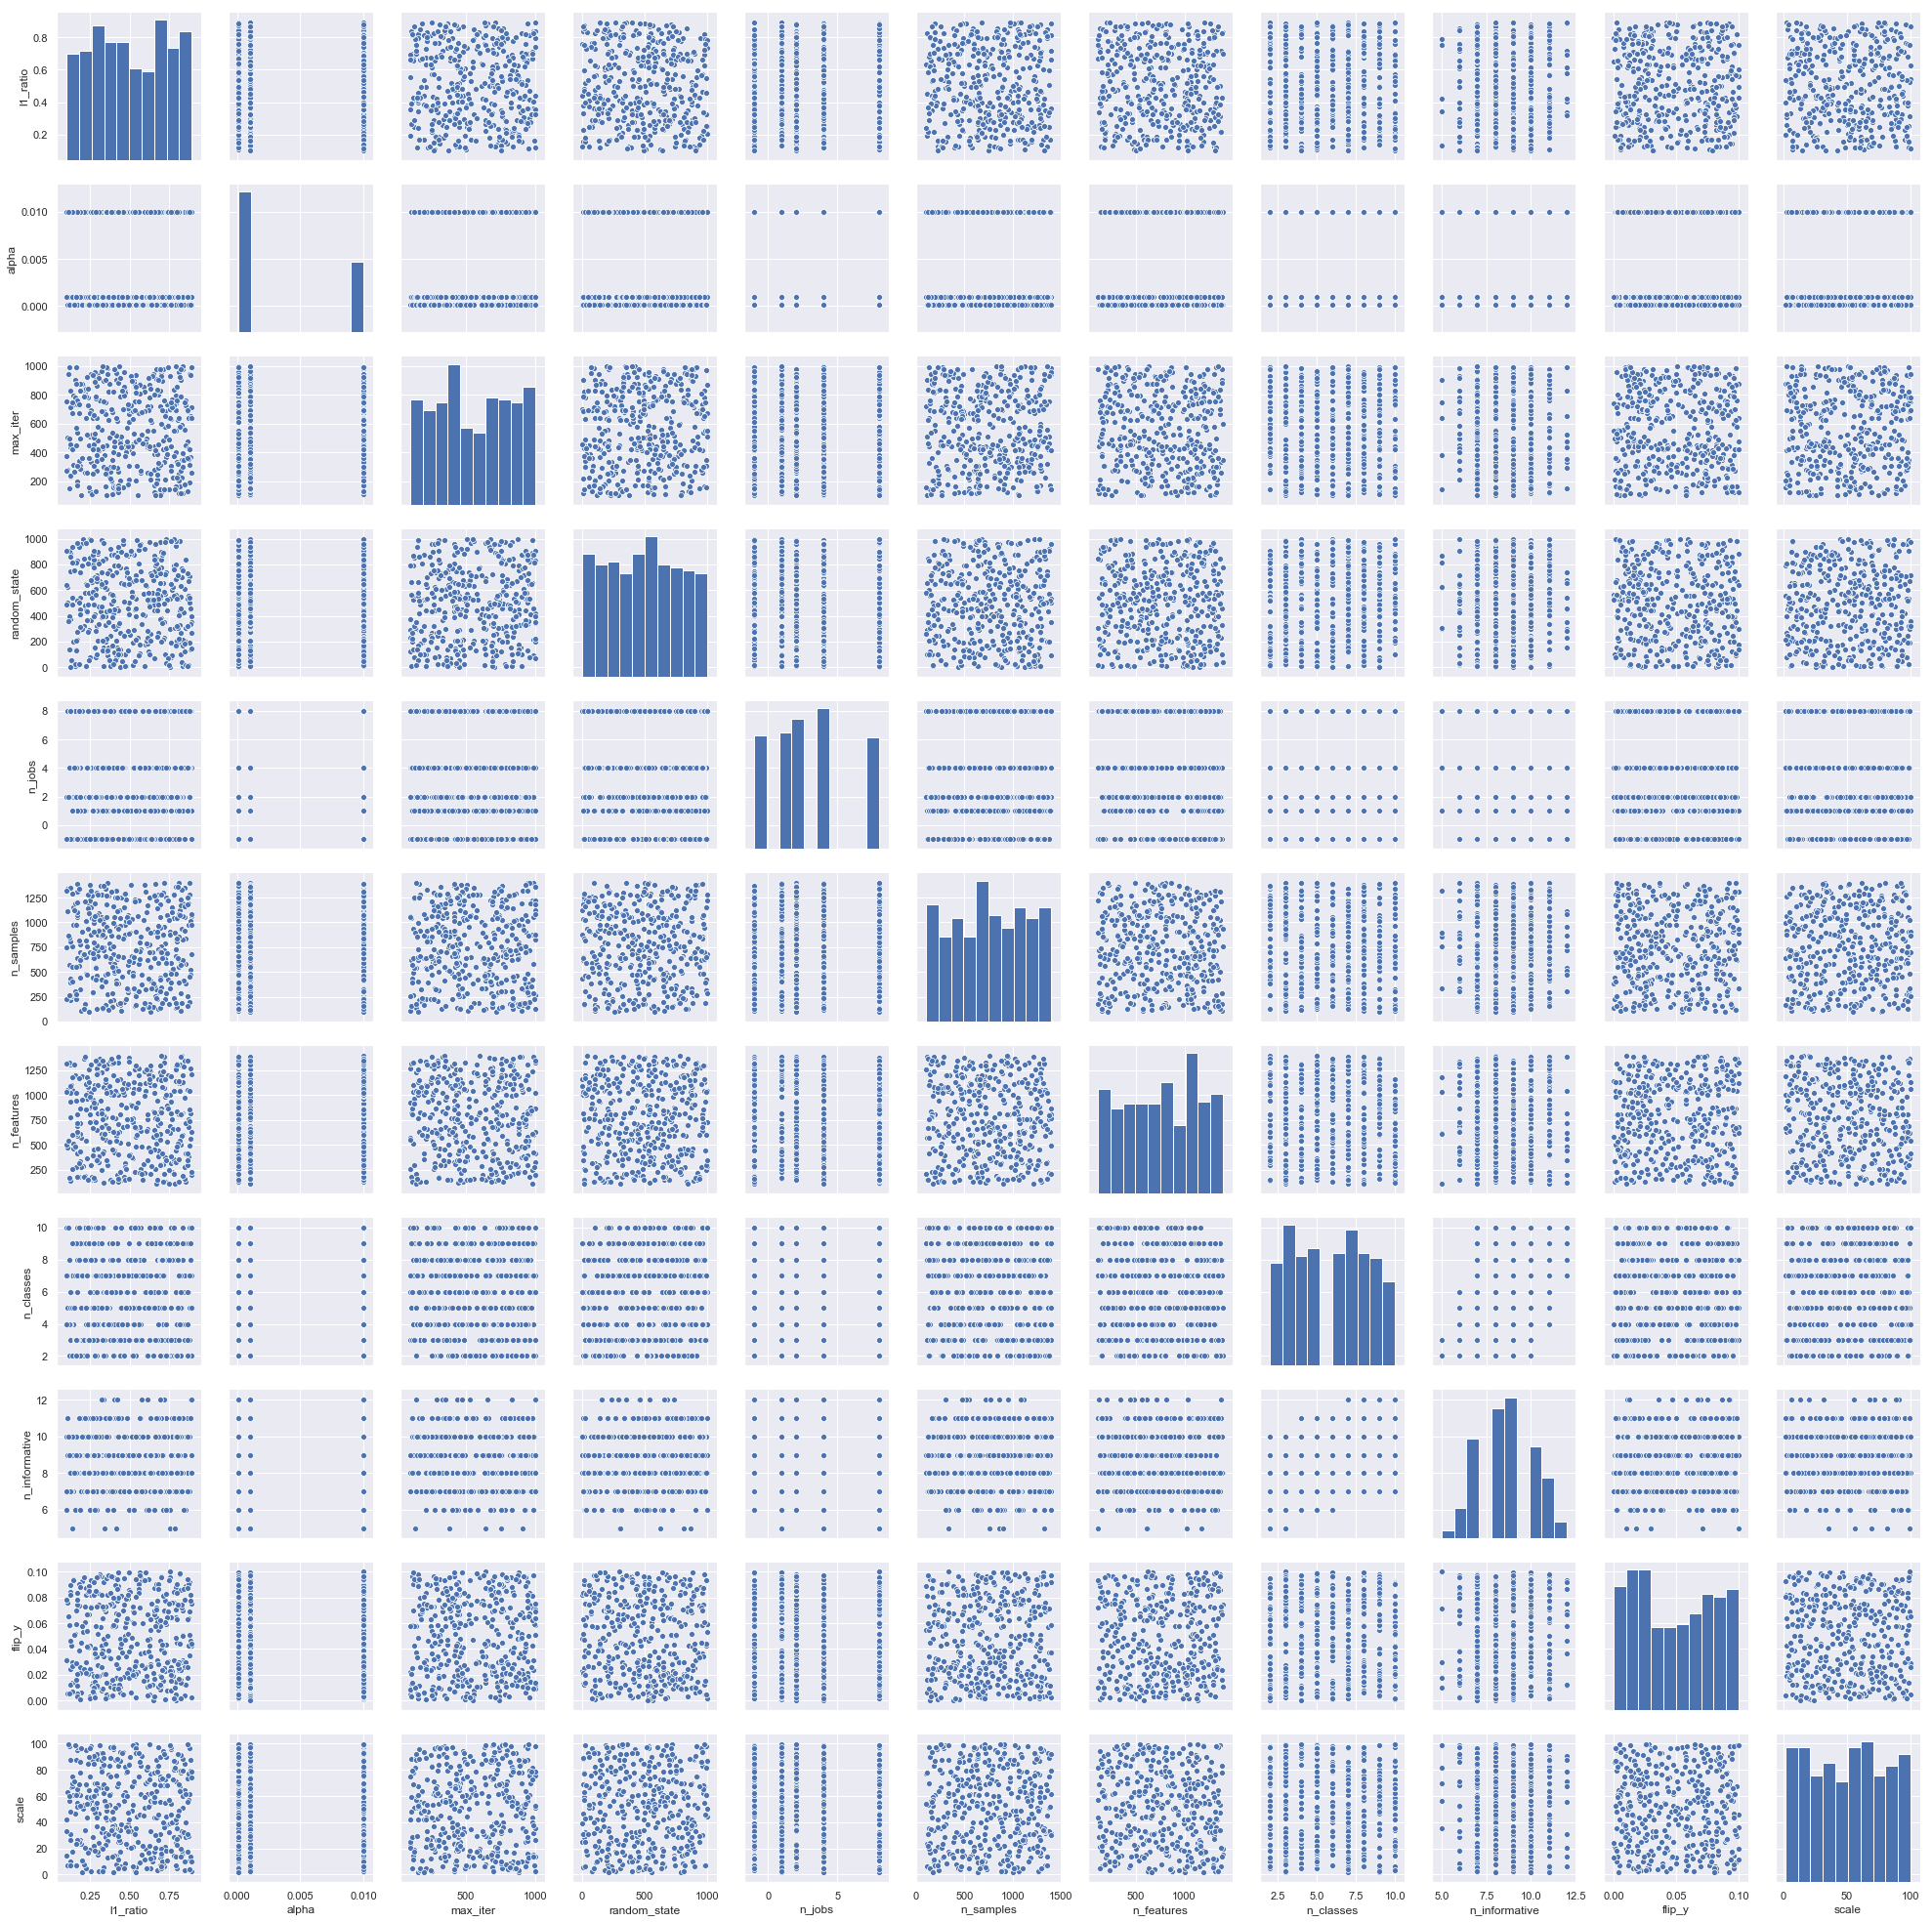

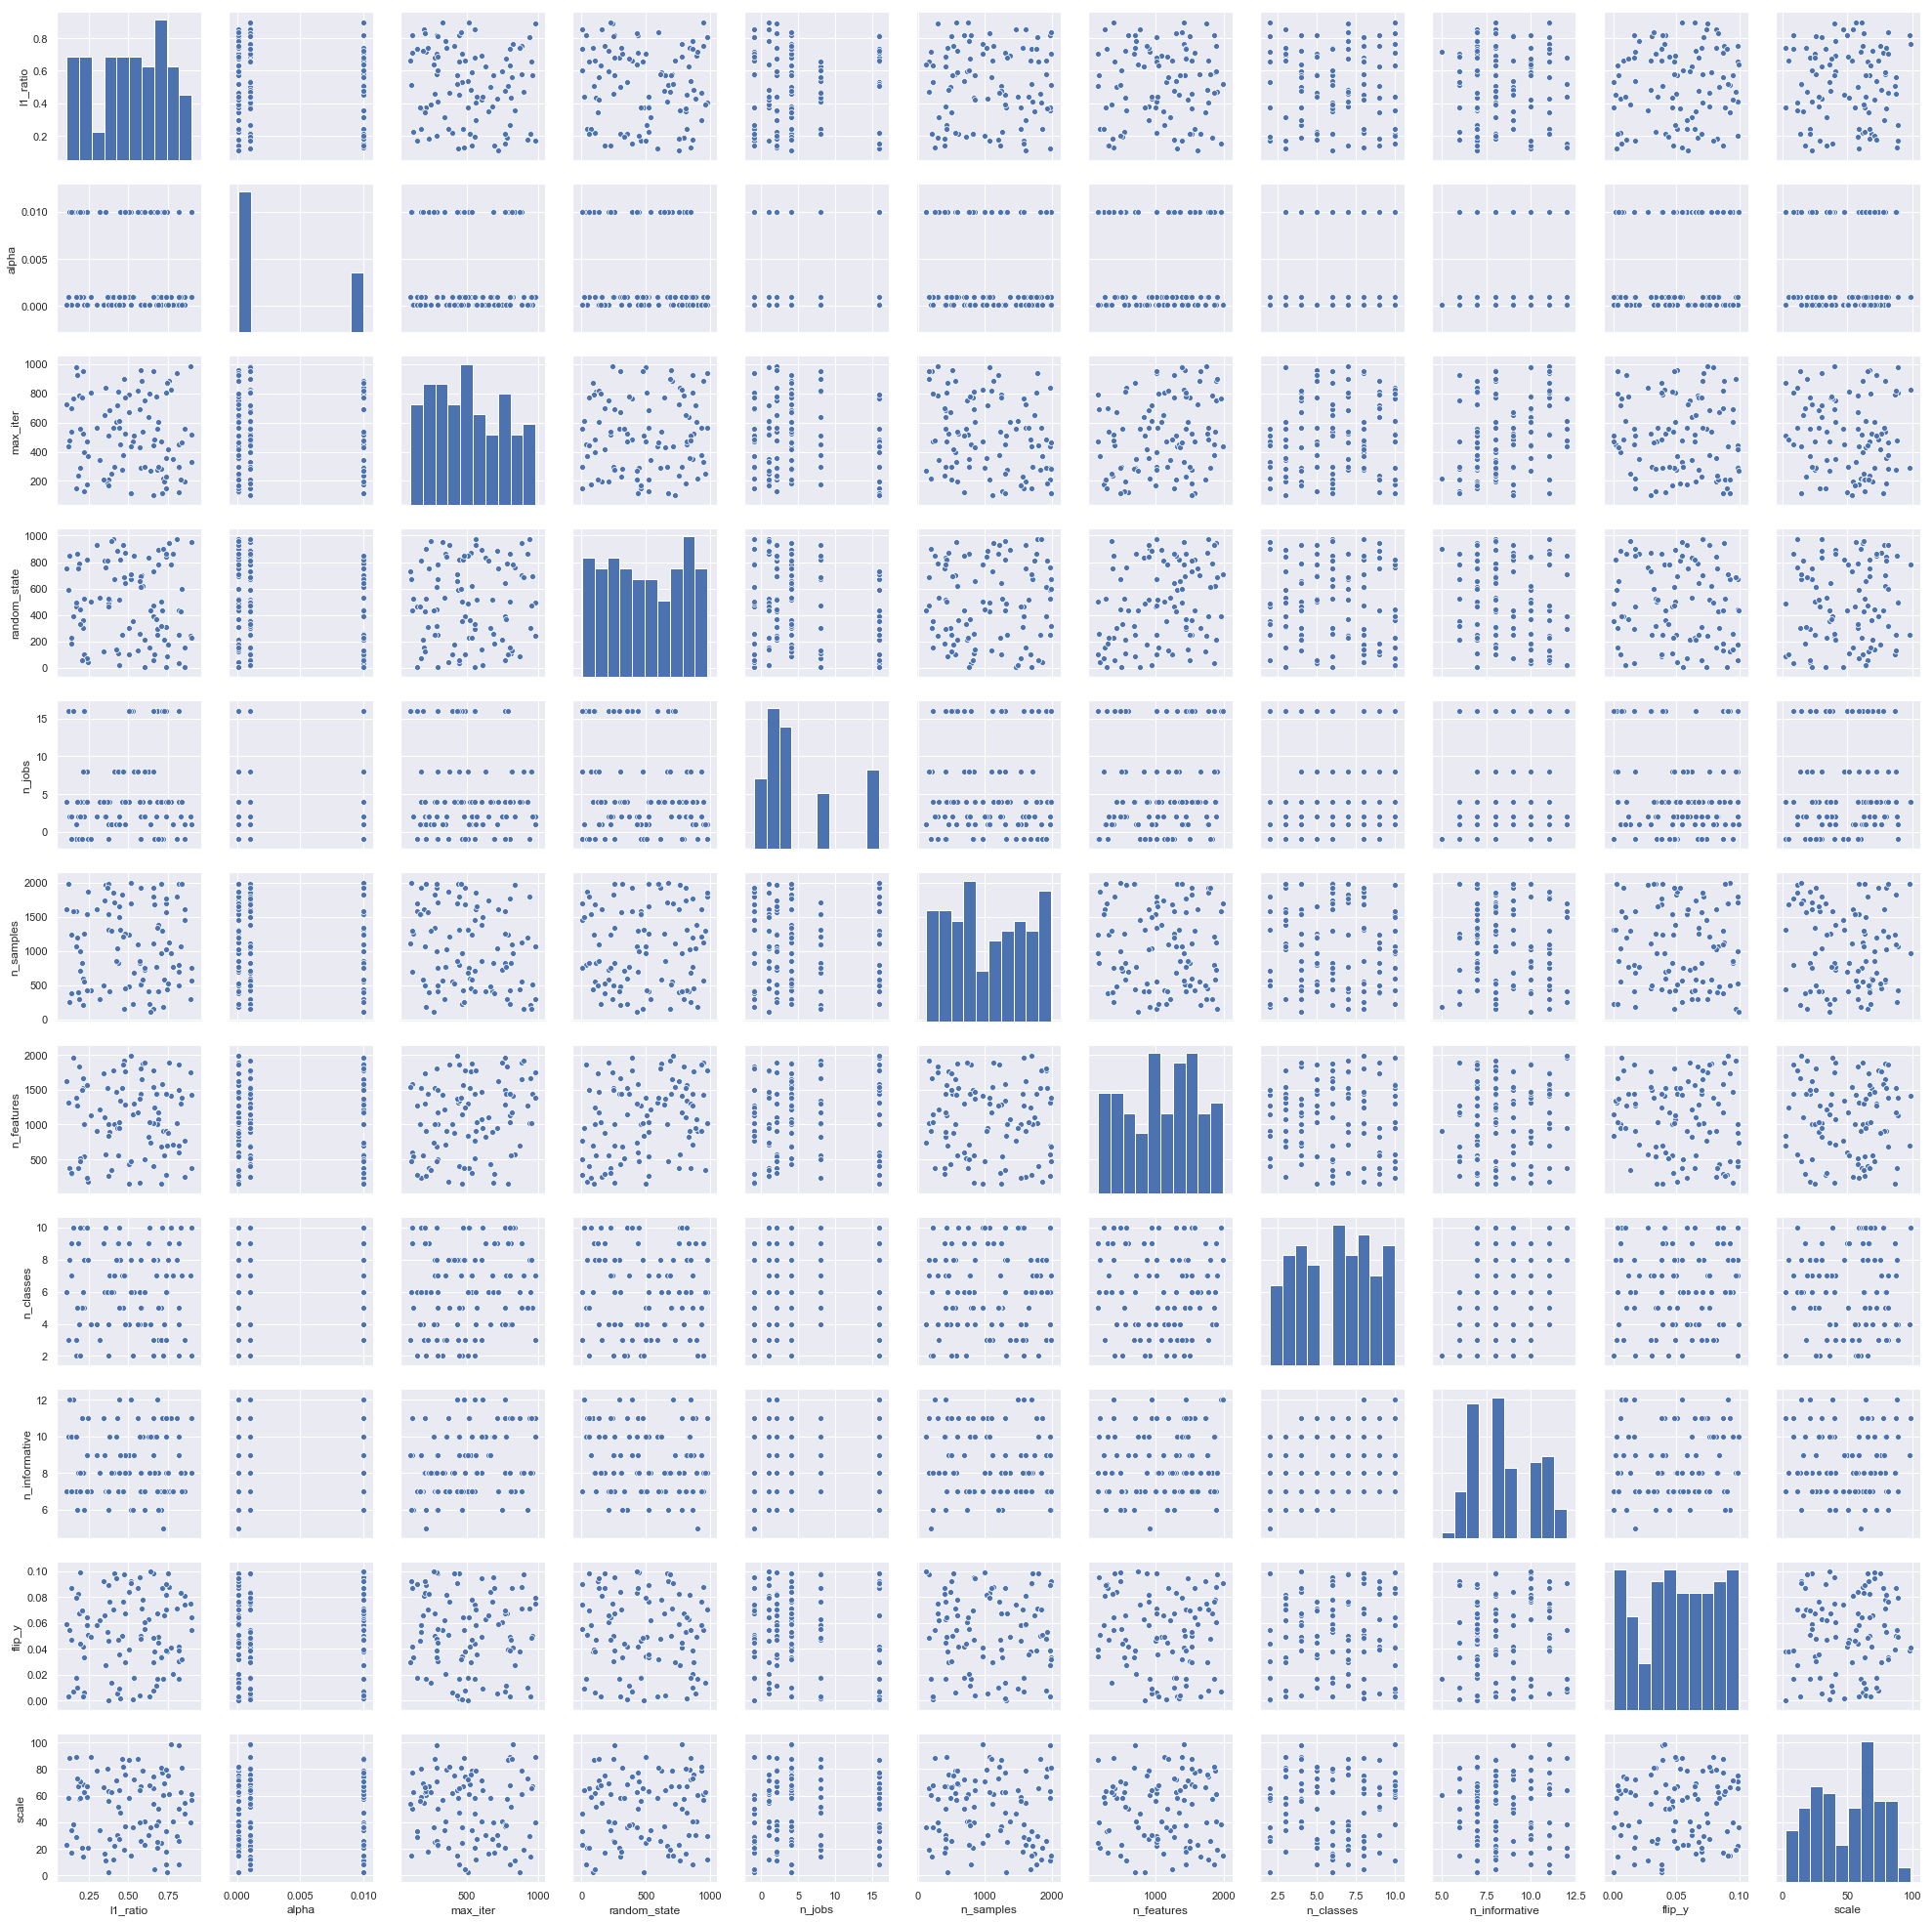

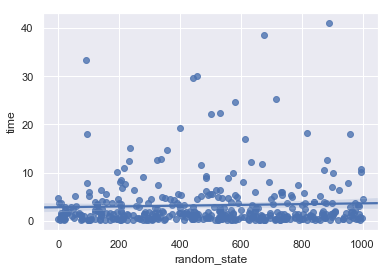

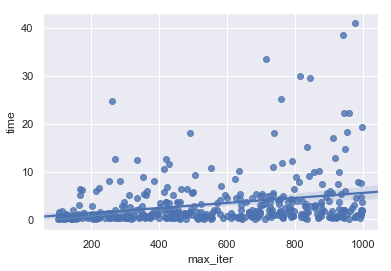

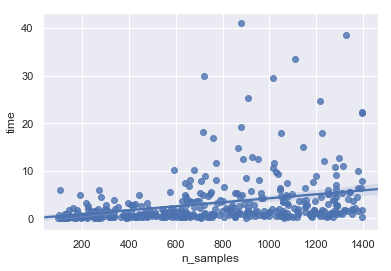

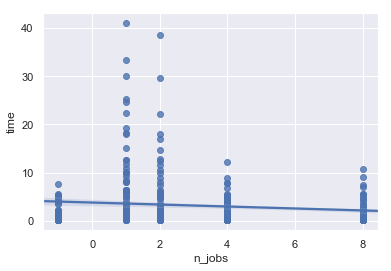

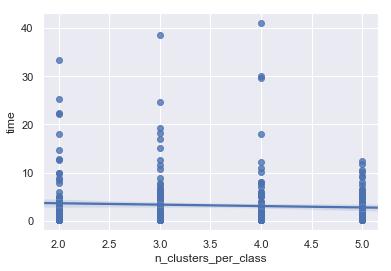

(400, 15)

In [4]:
corrmat = train_set.corr()
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)#heat plot

sns.set()
cols = ['penalty','l1_ratio','alpha','max_iter','random_state','n_jobs','n_samples','n_features','n_classes','n_informative','flip_y','scale']
sns.pairplot(train_set[cols], height = 2.5)
plt.show();

sns.pairplot(test_set[cols], height = 2.5)
plt.show();


# Checking for outliers in GrLivArea as indicated in dataset documentation
sns.regplot(x=train_set['random_state'], y=train_set['time'], fit_reg=True)
plt.show()

# Checking for outliers in GrLivArea as indicated in dataset documentation
sns.regplot(x=train_set['max_iter'], y=train_set['time'], fit_reg=True)
plt.show()

# Checking for outliers in GrLivArea as indicated in dataset documentation
sns.regplot(x=train_set['n_samples'], y=train_set['time'], fit_reg=True)
plt.show()

# Checking for outliers in GrLivArea as indicated in dataset documentation
sns.regplot(x=train_set['n_jobs'], y=train_set['time'], fit_reg=True)
plt.show()


sns.regplot(x=train_set['n_clusters_per_class'], y=train_set['time'], fit_reg=True)
plt.show()

train_set.shape


# Feature engineering

In [5]:
y=train_set['time'].copy()
logy=np.log1p(y)
train_set=train_set.drop(columns=['time'])
train_set=train_set.drop(columns=['id'])
#train_set=train_set.drop(columns=['n_jobs'])
#train_set=train_set.drop(columns=['n_clusters_per_class'])
ID=test_set['id']
test_set=test_set.drop(columns=['id'])
#test_set=test_set.drop(columns=['n_jobs'])
#test_set=test_set.drop(columns=['n_clusters_per_class'])
test_set.shape
train_set.shape
train_set.isnull().sum()  #### 
test_set.isnull().sum() ####similarly

(100, 13)

(400, 13)

penalty                 0
l1_ratio                0
alpha                   0
max_iter                0
random_state            0
n_jobs                  0
n_samples               0
n_features              0
n_classes               0
n_clusters_per_class    0
n_informative           0
flip_y                  0
scale                   0
dtype: int64

penalty                 0
l1_ratio                0
alpha                   0
max_iter                0
random_state            0
n_jobs                  0
n_samples               0
n_features              0
n_classes               0
n_clusters_per_class    0
n_informative           0
flip_y                  0
scale                   0
dtype: int64

# feature engineering 2

In [6]:
####  n_job   -1  变16
####random state  删掉
###n_informative  删掉
train_set.n_jobs[train_set.n_jobs ==-1] = 16
test_set.n_jobs[test_set.n_jobs ==-1] = 16
train_set=train_set.drop(columns=['random_state'])
test_set=test_set.drop(columns=['random_state'])

train_set=train_set.drop(columns=['n_informative'])
test_set=test_set.drop(columns=['n_informative'])
train_set=train_set.drop(columns=['l1_ratio'])
test_set=test_set.drop(columns=['l1_ratio'])

C:\Users\Ashley\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Ashley\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# distribution change and new features

In [8]:
def sample(num):
    if num>600:
        return 1
    else: 
        return 0

In [9]:

from scipy.stats import skew
joint2 = pd.concat([train_set, test_set], axis=0)
joint2['plus']=joint2['n_features']*joint2['n_samples']*joint2['max_iter']*joint2['n_classes']/joint2['n_jobs']
joint2['smaple']=joint2['n_samples'].apply(sample)
# Fix for skewness



In [10]:
#data['feature_1'] = data['max_iter'] * data['n_samples'] * data['n_features'] * data['n_classes'] / data['n_jobs']

joint2['scale']=np.log1p(joint2['scale'])
train_set = joint2.head(train_set.shape[0])
test_set= joint2.tail(test_set.shape[0])


In [11]:
cat2=[ 'alpha', 'max_iter', 'n_jobs', 'n_samples', 'n_features',
       'n_classes', 'n_clusters_per_class', 'flip_y', 'scale', 'plus',
       'smaple']
for feature in cat2:
    train_set[feature] = (train_set[feature]-test_set[feature].min())/test_set[feature].std()
    test_set[feature] = (test_set[feature]-test_set[feature].min())/test_set[feature].std()

C:\Users\Ashley\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Ashley\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
test_set.describe()

,alpha,max_iter,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,flip_y,scale,plus,smaple
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.751928,1.616678,1.075109,1.620211,1.787151,1.651253,1.208111,1.770415,3.670458,0.615129,1.450431
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.743273,0.163390,0.704323,0.965732,0.799638,0.000000,1.064694,3.118502,0.061153,0.000000
50%,0.206008,1.518343,0.490171,1.574268,1.845790,1.599276,0.881833,1.750543,4.064485,0.251577,2.132987
75%,2.266085,2.482213,2.450857,2.542120,2.576395,2.398915,1.763666,2.586923,4.373314,0.692241,2.132987
max,2.266085,3.493779,2.450857,3.238248,3.512617,3.198553,2.645499,3.378656,4.878333,6.119190,2.132987


# dummy

In [13]:
joint = pd.concat([train_set, test_set], axis=0)
cat= joint.select_dtypes(include=['object']).axes[1]
for col in cat:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    joint.drop(col, axis=1, inplace=True)
train_dum = joint.head(train_set.shape[0])
test_dum= joint.tail(test_set.shape[0])

In [14]:
train_dum.shape
test_dum.shape
y.describe()

(400, 15)

(100, 15)

count    400.000000
mean       3.202330
std        5.265786
min        0.075342
25%        0.504478
50%        1.405072
75%        3.628776
max       41.099969
Name: time, dtype: float64

# 数据标准

In [15]:
from sklearn.decomposition import PCA
'''
pca=PCA(n_components=10)
train_dum=pca.fit_transform(train_dum)
test_dum=pca.transform(test_dum)
'''
####standardize the numerical features
scaler = StandardScaler()
scaler.fit(train_dum)
train_dum= scaler.transform(train_dum)
test_dum= scaler.transform(test_dum)

'\npca=PCA(n_components=10)\ntrain_dum=pca.fit_transform(train_dum)\ntest_dum=pca.transform(test_dum)\n'

C:\Users\Ashley\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

C:\Users\Ashley\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Ashley\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


# 模型选择     NN

In [16]:
from keras import models
from keras import layers
def build_model():
    '''
    
    '''
    model = models.Sequential()
    model.add(layers.Dense(25, activation='relu', input_shape=(train_dum.shape[1],)))
   # model.add(layers.Dense(500,activation='relu'))
    #model.add(layers.Dense(200,activation='relu'))
   # model.add(layers.Dense(100,activation='relu'))
   # model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(25,activation='relu'))
    model.add(layers.Dense(1,activation='relu'))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


Using TensorFlow backend.


### cross validation of nn

In [17]:
import numpy as np
k = 4
num_val_samples = len(train_dum) // k #整数除法
num_epochs =15
all_scores = []
for i in range(k):
    print('processing fold #', i)
    #依次把k分数据中的每一份作为校验数据集
    val_data = train_dum[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = y[i* num_val_samples : (i+1) * num_val_samples]
    
    #把剩下的k-1分数据作为训练数据,如果第i分数据作为校验数据，那么把前i-1份和第i份之后的数据连起来
    partial_train_data = np.concatenate([train_dum[: i * num_val_samples], 
                                         train_dum[(i+1) * num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([y[: i * num_val_samples], 
                                            y[(i+1) * num_val_samples: ]],
                                          axis = 0)
    print("build model")
    model = build_model()
    #把分割好的训练数据和校验数据输入网络
    model.fit(partial_train_data, partial_train_targets, epochs =30, 
              batch_size =16, verbose = 0)
    print("evaluate the model")
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mse)
    
print(all_scores)

processing fold # 0
build model


evaluate the model
processing fold # 1
build model


evaluate the model
processing fold # 2
build model


evaluate the model
processing fold # 3
build model


evaluate the model
[1.1423831570148468, 6.1646332263946535, 5.982657747268677, 2.5643992900848387]


In [18]:
model = build_model()
model.fit(train_dum, y, epochs = 40, batch_size =20, verbose = 0)
p1=model.predict(test_dum)
p2=model.predict(train_dum)

(array([62., 17., 10.,  5.,  2.,  1.,  0.,  1.,  1.,  1.]),
 array([ 0.        ,  3.55639801,  7.11279602, 10.66919403, 14.22559204,
        17.78199005, 21.33838806, 24.89478607, 28.45118408, 32.00758209,
        35.5639801 ]),
 <a list of 10 Patch objects>)

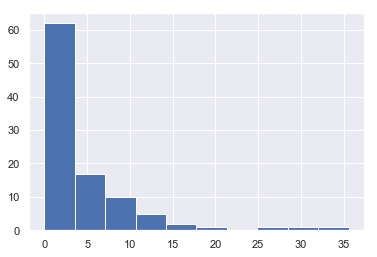

In [20]:
import matplotlib.pyplot as plt
plt.hist(p1)

plt.show()


In [19]:
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(y, p2)
mse2

1.1383968854716935

# 建模   


In [21]:
submission=pd.DataFrame()
submission['id']=ID
submission['time']=p1
submission.to_csv('keras1119f3.csv',index=False)

# KRR  the best

In [22]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,RANSACRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb

In [23]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=True).get_n_splits(train_dum)
    rmse= np.sqrt(-cross_val_score(model, train_dum, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [24]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.5, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.5, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.7)

GBoost = GradientBoostingRegressor()

model_xgb = xgb.XGBRegressor()

model_lgb = lgb.LGBMRegressor(objective='regression')
svr_rbf = SVR(kernel='rbf',C=1e1, gamma='auto')
svr_lin = SVR(kernel='linear',gamma='scale')
svr_poly = SVR(kernel='poly',degree=2,gamma='scale')

bridge=BayesianRidge()
icll=LassoLarsIC()

rf=RandomForestRegressor(n_estimators=3)

ra=RANSACRegressor()

In [25]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("\nENet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("\nGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("\nmodel_xgbt score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("\nmodel_lgb score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score_rbf = rmsle_cv(svr_rbf)
print("\nrbf score: {:.4f} ({:.4f})\n".format(score_rbf.mean(), score_rbf.std()))
score_lin=rmsle_cv(svr_lin)
print("\nlin score: {:.4f} ({:.4f})\n".format(score_lin.mean(), score_lin.std()))
score_poly = rmsle_cv(svr_poly)
print("\npoly score: {:.4f} ({:.4f})\n".format(score_poly.mean(), score_poly.std()))

score_br=rmsle_cv(bridge)
print("\bridge score: {:.4f} ({:.4f})\n".format(score_br.mean(), score_lin.std()))

score_icll = rmsle_cv(icll)
print("\icll score: {:.4f} ({:.4f})\n".format(score_icll.mean(), score_poly.std()))

score_rf= rmsle_cv(rf)
print("\ rfscore: {:.4f} ({:.4f})\n".format(score_rf.mean(), score_poly.std()))


Lasso score: 3.2041 (0.8150)


ENet score: 3.1881 (0.8011)


KRR score: 1.2154 (0.4297)


GBoost score: 2.2208 (1.1032)


model_xgbt score: 2.2342 (0.8554)


model_lgb score: 2.4304 (1.1797)


rbf score: 1.7998 (1.0294)


lin score: 3.5942 (1.0116)


poly score: 4.4220 (1.2283)

ridge score: 2.8660 (1.0116)

\icll score: 2.9028 (1.2283)

\ rfscore: 2.4122 (1.2283)



In [26]:
from sklearn.metrics import mean_squared_error
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.7)
model1=KRR.fit(train_dum,y)
predictions =KRR.predict(train_dum)
###accuracy of training set
explogp22=np.expm1(predictions)

explogp22[explogp22<0.07]=0.07
mse =mean_squared_error(y, predictions)
print(mse)



p1=KRR.predict(test_dum)

explogy=np.expm1(p1)

explogy[explogy<0.07]=0.07
p1[p1<0.07]=0.07
submission=pd.DataFrame()
submission['id']=ID
submission['time']=p1
submission.to_csv('keridge1119444.csv',index=False)

0.3760324761321793


In [25]:
from sklearn.metrics import mean_squared_error
svr_lin =  lgb.LGBMRegressor(objective='regression')
model1=svr_lin.fit(train_dum,y)
predictions =svr_lin.predict(train_dum)
###accuracy of training set
mse =mean_squared_error(y, predictions)
explog1aa=np.expm1(predictions)
print(mse)



p1=svr_lin.predict(test_dum)

explogy=np.expm1(p1)

p1[p1<0.07]=0.07
explogy[explogy<0.07]=0.07
mse =mean_squared_error(y, explog1aa)
mse
submission=pd.DataFrame()
submission['id']=ID
submission['time']=p1
submission.to_csv('rbf1194r.csv',index=False)

2.886114414259816


3.8775859679895704e+25